Olá, Eric

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Bons gráficos
- P rojeto está bem escrito em inglês

Excelente trabalho. Não encontrei pontos de melhoria além de apresentar as hipóteses antes do teste. Parabéns pelo empenho.


</div>




**O projeto será feito em inglês, porque assim eu já preparo para um portfolio :)**


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns pela iniciativa. 
</div>

# A/B Test and Business Hypothesis Prioritization for Online Store

# Introduction

## Business Context

As a data analyst at a large online retail company, your team and the marketing department have compiled a set of hypotheses to increase revenue. Your job is to prioritize these hypotheses, run an A/B test, and analyze the results to make data-driven recommendations.

## Project Goals

1. Prioritize business hypotheses using ICE and RICE frameworks, and compare them.
2. Analyze the results of an A/B test, check for statistical significance, detect anomalies, and provide actionable recommendations.

## Data Sources

- **hypotheses_us.csv**: List of hypotheses with Reach, Impact, Confidence, and Effort scores.
- **orders_us.csv**: Individual order transactions during the test.
- **visits_us.csv**: Visitor counts by day and test group.

---

First, we'll load the list of business hypotheses and inspect their structure. This will help us ensure data quality and understand the columns we will use for prioritization frameworks (ICE, RICE).

In [1]:
import pandas as pd

#NOTE:The hypotheses file used a semicolon (`;`) as a separator, so I had to specify this delimiter to correctly parse the columns.
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

print(hypotheses.head())

# Check data types and missing values
print('\nData Info:')
print(hypotheses.info())
print('\nMissing Values:')
print(hypotheses.isnull().sum())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory us

---

# Step 2: Calculate ICE Score for Each Hypothesis

Here we'll be using the ICE formula to prioritize which hypothesis to test first, based on:

**Impact:** How much will this hypothesis move our key metric?

**Confidence:** How sure are we about the impact?

**Effort:** How much effort/resources does it take?

The ICE score helps us focus on “high reward, low effort, high confidence” actions.

---

In [2]:
#Here we'll be adding the ICE column to the dataframe
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_ice = hypotheses.sort_values(by='ICE', ascending=False)

display(hypotheses_ice[['Hypothesis', 'ICE']])

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


**As a result, we have the best ICE scores. According to ICE, these are the best bets to test first:**

* `Launch a promotion that gives users discounts on their first purchase` (ICE: 16.2)
* `Add two new channels for attracting traffic...` (ICE: 13.3)
* `Add a subscription form to all the main pages...` (ICE: 11.2)

**The hypoteses have low priorities:**

*Changing the background color, category structure, or launching your own delivery service have low ICE (1–2).*

These might have low impact, low confidence, or are high effort.

---
# Applying the RICE Framework

**Reach:** How many users will this actually touch?

*Sometimes a high-impact idea is only relevant to a small group or vice-versa!*

---

In [3]:
#Adding RICE column to dataframe

hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_rice = hypotheses.sort_values(by='RICE', ascending=False)

display(hypotheses_rice[['Hypothesis', 'RICE']])

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


### RICE score Key Observations:

`Add a subscription form to all the main pages...` (RICE: 112.0)

* This moved up from third in ICE to first in RICE.

`Add product recommendation blocks...` (RICE: 56.0)

* Also moved up, was middle of the pack in ICE.

`Add two new channels for attracting traffic...` and `Show banners with current offers...` (RICE: 40.0)

* These are strong performers in both frameworks.

`Launch a promotion that gives users discounts...` dropped down, despite being the top by ICE, possibly due to lower reach.

**The low-priority ideas (background color, review page) stay at the bottom in both rankings.**

---
*As we can see, RICE changes the prioritization*

ICE is great for a quick “gut check,” but RICE brings Reach into the mix, making it much more realistic for business decisions.

Hypotheses with a higher reach can jump to the top, even if their ICE was only average.

A high-impact, high-confidence, but niche idea will rank lower with RICE than ICE.

## Part 1 Conclusion: Hypothesis Prioritization

We prioritized our business hypotheses using two frameworks: **ICE** and **RICE**.

- **ICE** (Impact, Confidence, Effort) is a quick way to compare ideas, but it doesn’t consider how many users will be affected.
- **RICE** (Reach, Impact, Confidence, Effort) adds the “Reach” factor, highlighting hypotheses that can impact more users.

**Result:**  
Some hypotheses that were average in ICE jumped to the top of the list with RICE (e.g., adding a subscription form and product recommendation blocks). Meanwhile, the discount promotion—while very impactful per user—dropped in priority since it would reach fewer people.

**Takeaway:**  
RICE is often more suitable for business decisions, as it balances potential impact with how broadly each hypothesis will affect the customer base.  
Based on this, our next tests should focus on the subscription form and product recommendations.

---


# Part 2: A/B Test Analysis

In [4]:
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

#Printing data for a quick look
print("Orders sample:")
display(orders.head())

print("\nOrders info:")
print(orders.info())
print("\nMissing values in orders:")
print(orders.isnull().sum())

print("\nVisits sample:")
display(visits.head())

print("\nVisits info:")
print(visits.info())
print("\nMissing values in visits:")
print(visits.isnull().sum())


Orders sample:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



Orders info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None

Missing values in orders:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Visits sample:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Visits info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Missing values in visits:
date      0
group     0
visits    0
dtype: int64


It looks like our data is clean, no missing values, types are what we expect.


**Orders:** Each row is a transaction—includes order date, user, amount, group (A or B).

**Visits:** Each row is daily visit counts, for each group.

---

In [5]:
#First, for our data preparation we need to convert our date values
#Also, we are going to check if our users are both in group A and B

orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])


duplicated_visitors = orders.groupby('visitorId')['group'].nunique()
users_in_both = duplicated_visitors[duplicated_visitors > 1].index
print(f"Number of users in both groups: {len(users_in_both)}")


###########

#58 was the result of visitors in both groups. As best practices, we're going to delete them
#If we run this code again, our result is going to be zero
orders = orders[~orders['visitorId'].isin(users_in_both)]

############

Number of users in both groups: 58


## Step 2: Cumulative Metrics for Each Group
Before visualizing or testing anything, we need to aggregate cumulative metrics day by day for both groups.
This will let us plot and analyze how revenue, orders, and conversion change over time.

We'll build:

* Cumulative orders
* Cumulative unique buyers
* Cumulative revenue
* Cumulative visits

In [6]:
#Por algum motivo eu tive que dar import mais uma vez, o codigo num tava funcionando sem
import pandas as pd

orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')


orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

### Step A: Creating a grid of all combinations of date

In [7]:
dates = orders['date'].sort_values().unique()
groups = orders['group'].unique()

datesGroups = pd.DataFrame([(date, group) for date in dates for group in groups], columns=['date', 'group'])
print(datesGroups.head())

        date group
0 2019-08-01     B
1 2019-08-01     A
2 2019-08-02     B
3 2019-08-02     A
4 2019-08-03     B


### Step B: Aggregating Orders

In [8]:
#E mais uma vez eu tive que dar import porque o codigo não queria reconhecer o visitors
import pandas as pd

# Load the visitors data
visitors = pd.read_csv('/datasets/visits_us.csv')
visitors['date'] = pd.to_datetime(visitors['date'])

In this step B, we are :

* *Grouping by date and group.*
* *Aggregate: count unique transaction IDs as orders, unique visitor IDs as buyers, sum the revenue.*
* *Sorting by date and group.*
* *Make cumulative sums per group — so each row is “up to this date, for this group.”*
* *Reseting the index to make the DataFrame easier to work with.*

In [9]:
ordersAggregated = (
    orders
    .groupby(['date', 'group'])
    .agg(
        orders=('transactionId', 'nunique'),   
        buyers=('visitorId', 'nunique'),       
        revenue=('revenue', 'sum')             
    )
    .sort_index()
    .groupby('group').cumsum() # make cumulative *within* each group
    .reset_index()
)

print(ordersAggregated.head())

        date group  orders  buyers  revenue
0 2019-08-01     A      24      20   2356.8
1 2019-08-01     B      21      20   1620.0
2 2019-08-02     A      44      39   3860.3
3 2019-08-02     B      45      43   4243.8
4 2019-08-03     A      68      63   5675.5


### Step C: Aggregating Visitors

In [10]:
visitorsAggregated = (
    visitors
    .groupby(['date', 'group'])
    .agg({'visits': 'sum'})
    .sort_index()
    .groupby('group').cumsum()  # cumulative visitors per group
    .reset_index()
)

print(visitorsAggregated.head())

        date group  visits
0 2019-08-01     A     719
1 2019-08-01     B     713
2 2019-08-02     A    1338
3 2019-08-02     B    1294
4 2019-08-03     A    1845


With this part done, now we have the following:

* *ordersAggregated (cumulative orders, buyers, and revenue)*
* *visitorsAggregated (cumulative visitors)*
* *Both sorted and ready*

### Next Step D : Merging Both Tables

In [11]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, on=['date', 'group']
)

# Set columns names
cumulativeData.columns = [
    'date', 'group', 'orders', 'buyers', 'revenue', 'visitors'
]

# Display the result
print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      39   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      63   5675.5      1845


### Building the Cumulative Dataset

To analyze the A/B test, we created the `cumulativeData` DataFrame. This table contains, for each test group and each day:
- The number of orders up to that date
- The number of unique buyers
- The total revenue generated
- The total number of visitors

This allows us to compare the performance of groups A and B over time and is the basis for our subsequent analyses and visualizations.

---

## Plotting Cumulative Revenue

This will helps us visualize the performance/trend of each group.

Here we'll be able to quickly spot if one group consistently outperforms the other, or if there are jumps/anomalies.


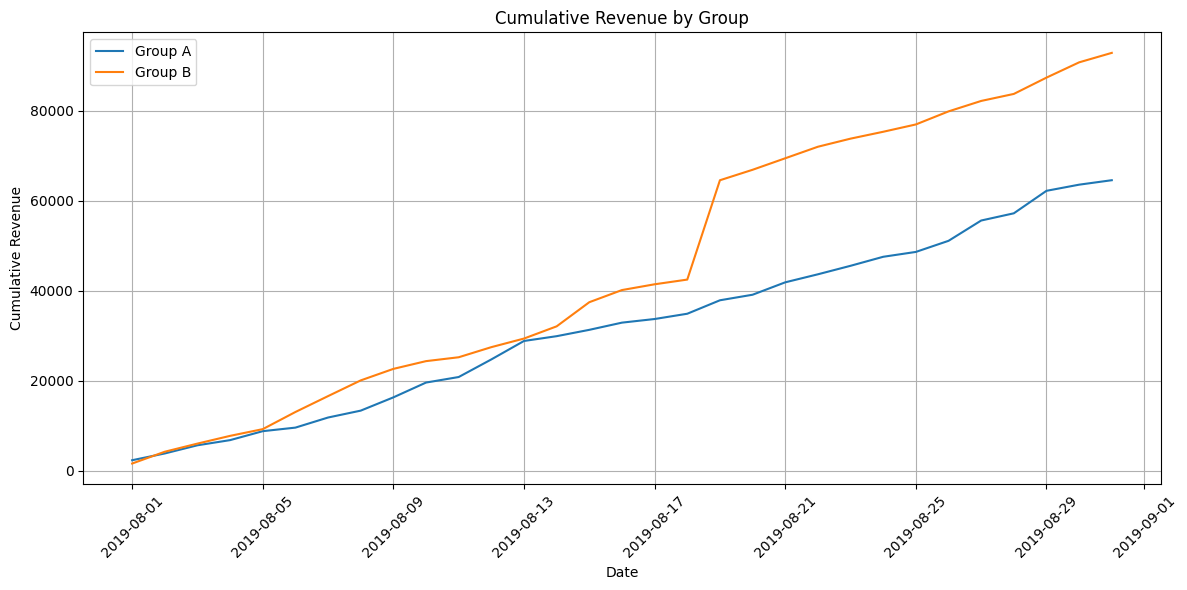

In [12]:
import matplotlib.pyplot as plt

# Separate the data by group
cumulative_a = cumulativeData[cumulativeData['group'] == 'A']
cumulative_b = cumulativeData[cumulativeData['group'] == 'B']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='Group A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='Group B')

plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Group B (orange) has a noticeably higher cumulative revenue than Group A (blue) by the end of the test period despite parallel growth early on.



The cumulative revenue plot shows that Group B outperformed Group A by the end of the experiment. While the revenue growth was similar for both groups initially, a sharp spike in Group B's revenue around mid-August widened the gap, and Group B maintained a higher cumulative revenue for the rest of the test.

This spike could be due to unusually large orders or a specific event impacting Group B. Further analysis of average order values and outliers will help clarify this. At this stage, Group B appears to have generated more revenue than Group A.

---

## Cumulative Average Order Value (AOV) by Group


The goal here is to plot the cumulative average order value (AOV) for each group over time.

This helps to check if the higher revenue in Group B is due to higher order values (bigger baskets per purchase), or just more frequent orders.


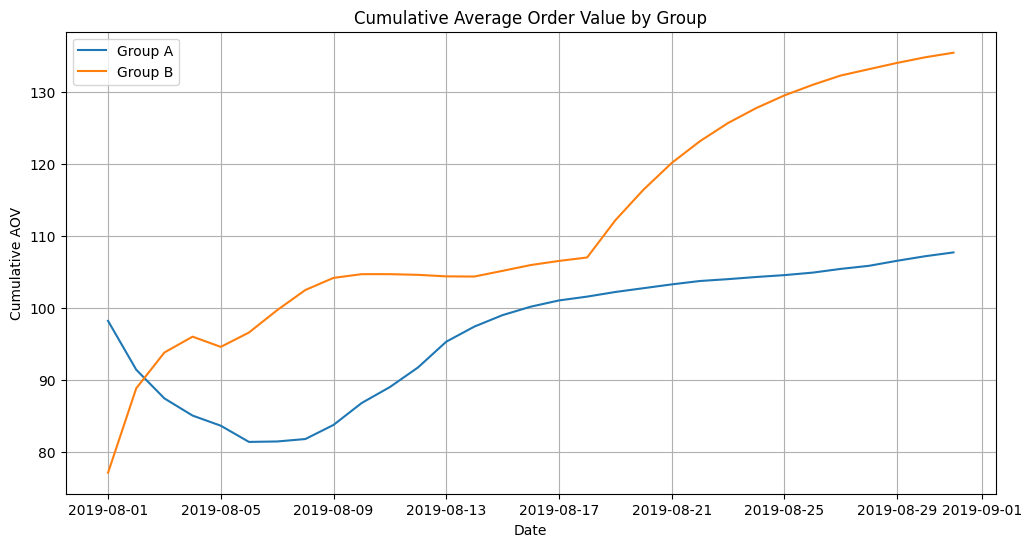

In [13]:
#Esse código já quebrou tantas vezes que eu nem sei mais. Tendo que adicionar uma cópia do dataframe aqui porque o jupyter quebra quando adiciono muitas markdown entre os códigos
cumulative_data = cumulativeData.copy()

#Calculate cumulative revenue and orders for each group and date
cumulative_data['cum_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()
cumulative_data['cum_orders'] = cumulative_data.groupby('group')['orders'].cumsum()

#Calculate cumulative average order value
cumulative_data['cum_aov'] = cumulative_data['cum_revenue'] / cumulative_data['cum_orders']

#Plot cumulative AOV by group
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for group in cumulative_data['group'].unique():
    group_data = cumulative_data[cumulative_data['group'] == group]
    plt.plot(group_data['date'], group_data['cum_aov'], label=f'Group {group}')

plt.title('Cumulative Average Order Value by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative AOV')
plt.legend()
plt.grid(True)
plt.show()


### Group A’s average order value (AOV) is more stable and lower overall, while B starts lower then rises much higher!

This spike in Group B’s, comparing from our previous plot, could point to an anomaly. Potentially a single user or small group making very large orders, or it could be a true effect of the experiment. This will be important to be taken a look with more details and statistical tests/results.

----

### Plotting the Relative Difference in Cumulative AOV

This will helps us understand how group B's average order value compares to A's throughout the experiment.

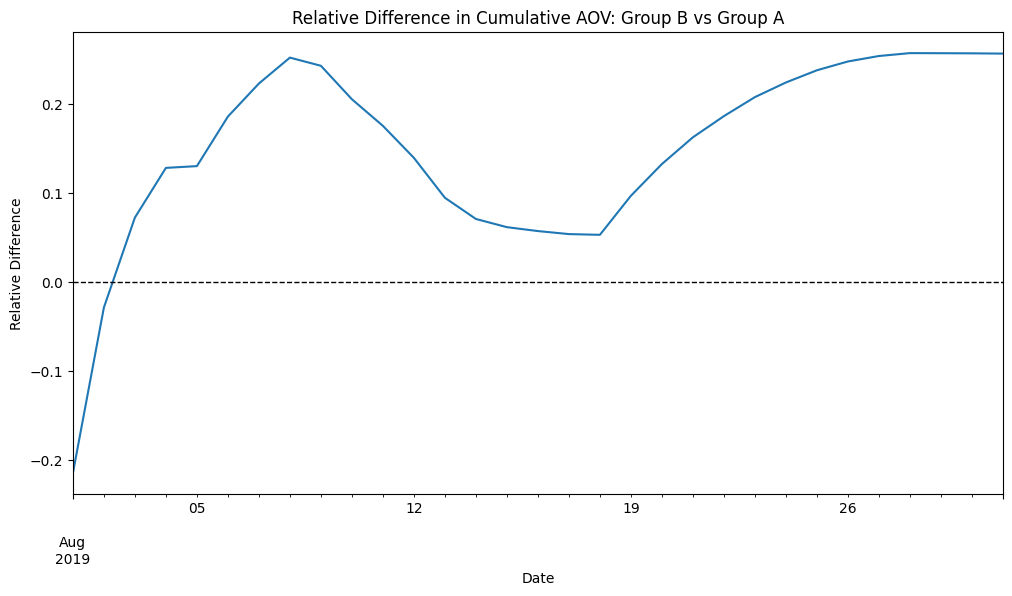

In [14]:
#Calculate cumulative metrics
cumulative_data = cumulative_data.sort_values(['date', 'group'])

cumulative_data['cum_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()
cumulative_data['cum_orders'] = cumulative_data.groupby('group')['orders'].cumsum()
cumulative_data['cum_aov'] = cumulative_data['cum_revenue'] / cumulative_data['cum_orders']

#Pivot to get Group A and Group B on same row for each date
pivot_aov = cumulative_data.pivot(index='date', columns='group', values='cum_aov')

#Compute relative difference for each date
pivot_aov['relative_diff'] = (pivot_aov['B'] - pivot_aov['A']) / pivot_aov['A']


pivot_aov['relative_diff'].plot(title='Relative Difference in Cumulative AOV: Group B vs Group A', figsize=(12,6))
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Relative Difference')
plt.xlabel('Date')
plt.show()


### The volatility and the big jump likely come from a few large orders or anomalies (That's our room for investigation!)

* On early days, the relative difference is negative, meaning **B** had a lower average order value than **A** right at the start. However, it came with a quick recovery, and the relative difference climbs sharply, peaking above 25%.
 
* Some fluctuations happened in daily order, which are really normal. This might've caused this volatility

---

## Calculate and Plot Daily Conversion Rate

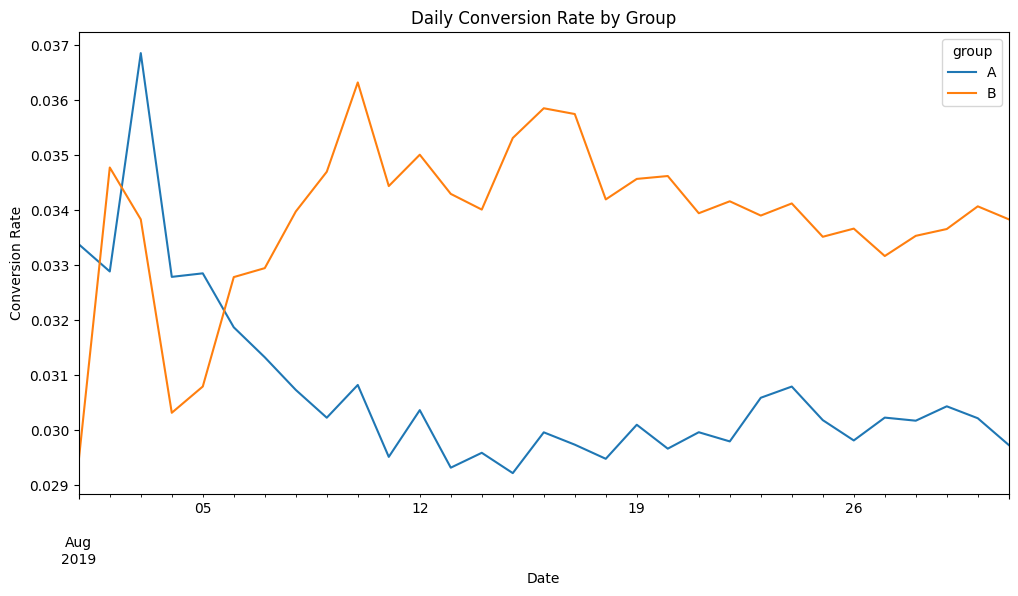

In [15]:
#Calculate daily conversion rate for each group
cumulative_data['conversion_rate'] = cumulative_data['orders'] / cumulative_data['visitors']

#Pivot for easy plotting
pivot_conv = cumulative_data.pivot(index='date', columns='group', values='conversion_rate')

#Plot
pivot_conv.plot(figsize=(12,6), title='Daily Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Date')
plt.show()

* Both groups are close, but Group A briefly spikes above B around day 2–3. After that, Group B’s conversion rate becomes consistently higher  for the rest of the test.

* This might means that the revenue increase isn’t only from higher average order value. Group B is also converting more visitors into buyers.

----

### Plotting cumulative in order to have more perspective/numbers

,date,group,orders,visitors
0,2019-08-01,A,24,719
1,2019-08-01,B,21,713
2,2019-08-02,A,44,1338
3,2019-08-02,B,45,1294
4,2019-08-03,A,68,1845


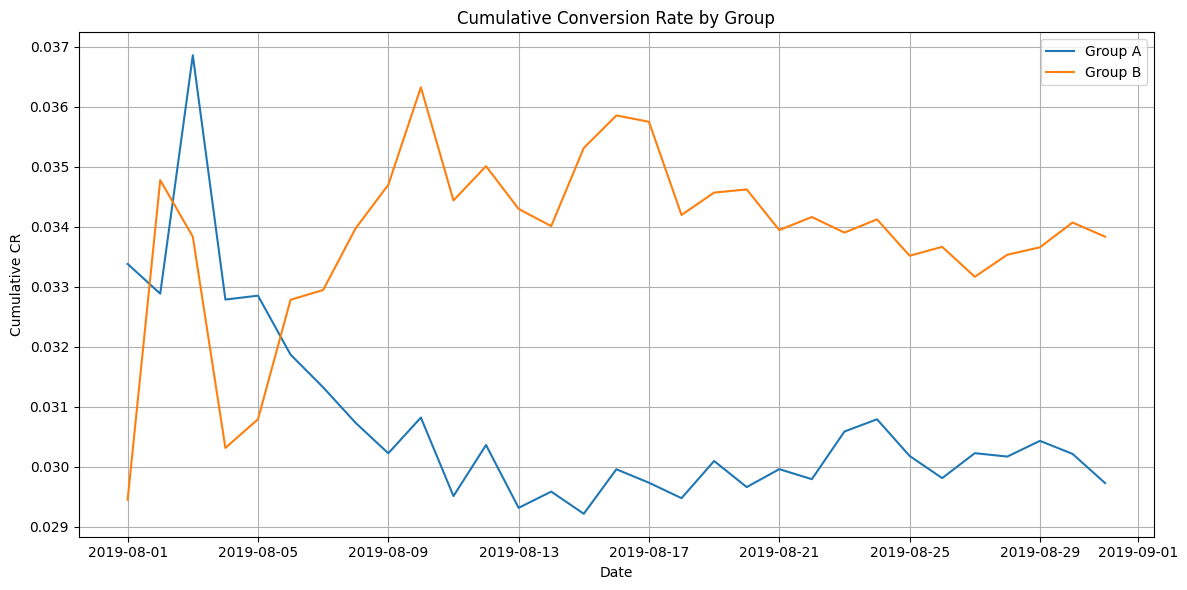

In [16]:
#Testando adicionar de novo esses codigos porque o está quebrando não é brincadeira
display(cumulativeData[['date','group','orders','visitors']].head())

#cumulative CR
cumulativeData['cum_cr'] = cumulativeData['orders'] / cumulativeData['visitors']

#plotting cumulative CR by group
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for g in cumulativeData['group'].unique():
    tmp = cumulativeData[cumulativeData['group'] == g]
    plt.plot(tmp['date'], tmp['cum_cr'], label=f'Group {g}')

plt.title('Cumulative Conversion Rate by Group')
plt.xlabel('Date'); plt.ylabel('Cumulative CR')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


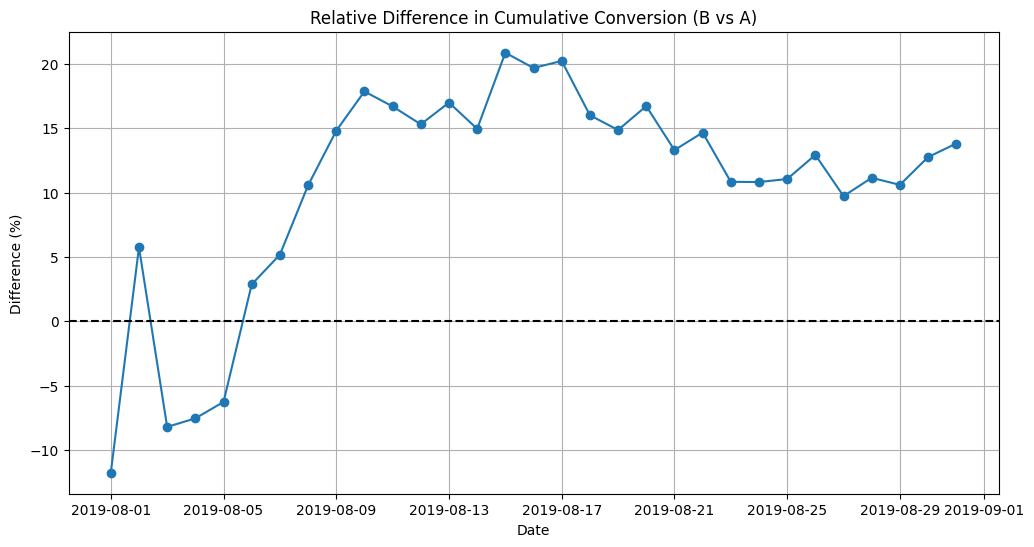

In [17]:
# Calculate cumulative orders per visitors for each group
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# Pivot table to have A and B side-by-side
conversion_pivot = cumulative_data.pivot(index='date', columns='group', values='conversion')

# Calculate the relative difference of B vs A
conversion_pivot['relative_difference'] = (conversion_pivot['B'] / conversion_pivot['A'] - 1) * 100

# Plot the relative difference
plt.figure(figsize=(12,6))
plt.plot(conversion_pivot.index, conversion_pivot['relative_difference'], marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative Difference in Cumulative Conversion (B vs A)')
plt.xlabel('Date')
plt.ylabel('Difference (%)')
plt.grid(True)
plt.show()


### Early days wobble a bit, then Group B stays +10–20% ahead!

That’s a strong, sustained advantage for Group B.

---

## Step 6: 95th & 99th Percentiles for Orders per user

*Here we will find heavy buyers and decide an anomaly cutoff.*

____

In [18]:
# Orders per user
orders_by_user = (
    orders.groupby('visitorId')
          .agg(orders_count=('transactionId', 'nunique'))
          .reset_index()
)


display(orders_by_user.describe())

# Percentile cutoffs
orders_p95 = orders_by_user['orders_count'].quantile(0.95)
orders_p99 = orders_by_user['orders_count'].quantile(0.99)
print(f"95th percentile (orders/user): {orders_p95}")
print(f"99th percentile (orders/user): {orders_p99}")

# See top users
display(orders_by_user.sort_values('orders_count', ascending=False).head(10))


,visitorId,orders_count
count,1.031000e+03,1031.000000
mean,2.130713e+09,1.161009
std,1.228157e+09,0.724919
min,5.114589e+06,1.000000
25%,1.048013e+09,1.000000
50%,2.147999e+09,1.000000
75%,3.154897e+09,1.000000
max,4.283872e+09,11.000000


95th percentile (orders/user): 2.0
99th percentile (orders/user): 4.0


,visitorId,orders_count
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


* we'll use `heavy_user_ids` later when we build the filtered dataset

In [19]:
# choose cutoff at the 99th percentile
orders_per_user_cutoff = 4

heavy_user_ids = orders_by_user.loc[
    orders_by_user['orders_count'] > orders_per_user_cutoff, 'visitorId'
]

print(f"Users above cutoff (> {orders_per_user_cutoff} orders): {len(heavy_user_ids)}")

Users above cutoff (> 4 orders): 10


Price 95th percentile: 435.54
Price 99th percentile: 900.90


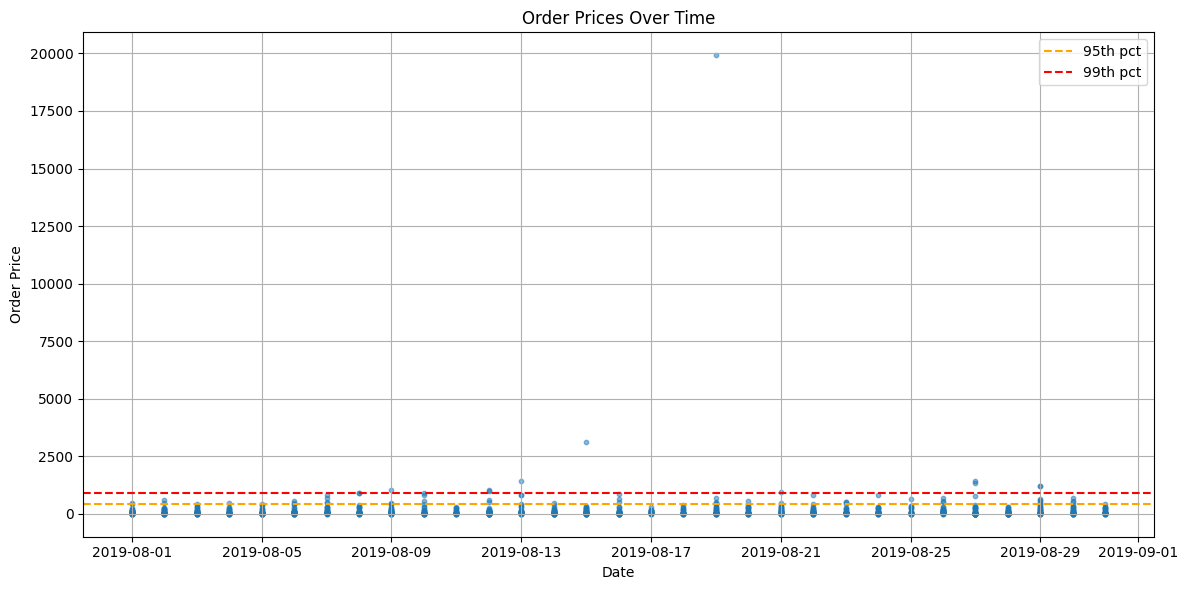

In [20]:
# 95th/99th percentiles of order prices
price_p95 = orders['revenue'].quantile(0.95)
price_p99 = orders['revenue'].quantile(0.99)
print(f"Price 95th percentile: {price_p95:.2f}")
print(f"Price 99th percentile: {price_p99:.2f}")

# Scatter of order prices (with reference lines)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(orders['date'], orders['revenue'], s=10, alpha=0.5)
plt.axhline(price_p95, color='orange', linestyle='--', label='95th pct')
plt.axhline(price_p99, color='red', linestyle='--', label='99th pct')
plt.title('Order Prices Over Time')
plt.xlabel('Date'); plt.ylabel('Order Price')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


In [21]:
# Use the 99th percentile as cutoff for price outliers
price_cutoff = orders['revenue'].quantile(0.99)
orders['is_price_outlier'] = orders['revenue'] > price_cutoff

print(f"Chosen price cutoff (99th pct): {price_cutoff:.2f}")
print(f"Outlier orders: {orders['is_price_outlier'].sum()} of {len(orders)} "
      f"({orders['is_price_outlier'].mean():.2%})")

# See the biggest orders
display(orders[orders['is_price_outlier']]
        .sort_values('revenue', ascending=False)
        .head(10)[['date','group','visitorId','transactionId','revenue']])

# How outliers distribute by group
display(orders.groupby(['group','is_price_outlier'])
               .size().unstack(fill_value=0))


Chosen price cutoff (99th pct): 900.90
Outlier orders: 12 of 1197 (1.00%)


,date,group,visitorId,transactionId,revenue
425,2019-08-19,B,1920142716,590470918,19920.4
1196,2019-08-15,B,2108080724,3936777065,3120.1
858,2019-08-27,A,1316129916,192721366,1450.2
1136,2019-08-13,A,1307669133,666610489,1425.8
744,2019-08-27,B,888512513,3668308183,1335.6
662,2019-08-29,A,4266935830,1811671147,1220.2
682,2019-08-29,B,4266935830,1216533772,1220.2
743,2019-08-09,A,4133034833,3603576309,1050.0
1103,2019-08-12,A,1164614297,1348774318,1025.8
1099,2019-08-12,A,148427295,316924019,1015.9


is_price_outlier,False,True
group,,
A,550,7
B,635,5


### Consideration

* *99th percentile ≈ 900.90.*
* *99% of orders are ≤ ~$901. Anything above that sits in the extreme tail.*

---

* Only 1.0% of orders are outliers (12 of 1,197).
* That’s small enough to filter without “throwing away the experiment.”

Outliers include very large tickets (e.g., ~$19,920 on 2019-08-19 in group B; plus ~3,120; ~1,450; etc.).
These are strong candidates for the big step we saw in B’s cumulative revenue around mid-August. They can heavily inflate AOV/Revenue and increase variance.

**Distribution across groups is similar:**

* Group A: 7 outliers
* Group B: 5 outliers
* This balance means filtering by price won’t obviously favor one group.

**Why we filter at the 99th percentile?**
* It keeps 99% of orders (typical behavior) while removing the long tail that can distort means and widen confidence intervals.

* Combined with the “heavy buyers” rule (> 4 orders per user, also a 99th-percentile cutoff), we get a robust “filtered” view that is standard in e-commerce A/B analysis.

**How this affects our story?**
* Conversion rate isn’t affected by order value filters (it’s orders/visits), but heavy buyers can still skew conversion if they place many orders.

* Revenue & AOV are directly affected by price outliers; filtering reduces spikes and makes the AOV comparison more reliable.

---

## Buildinng Filtered Orders

In [22]:
#First we'll be removing heavy buyers

orders_filt = orders[
    (~orders['visitorId'].isin(heavy_user_ids)) &
    (~orders['is_price_outlier'])
].copy()

print(f"Raw orders: {len(orders)} → Filtered orders: {len(orders_filt)}")
print("By group (raw):")
display(orders.groupby('group').size())
print("By group (filtered):")
display(orders_filt.groupby('group').size())


Raw orders: 1197 → Filtered orders: 1116
By group (raw):


group
A    557
B    640
dtype: int64

By group (filtered):


group
A    515
B    601
dtype: int64

**Rules applied:**

* Removed heavy buyers (> 4 orders per user, 99th percentile),
* Removed price outliers (order value > $900.90, 99th percentile).

**Impact on data:**
*Total orders: 1197 → 1116 (−81, ~6.8%).
*Group A: 557 → 515 (−42, ~7.5%).
*Group B: 640 → 601 (−39, ~6.1%).

**Price outliers were balanced across groups (earlier: A=7, B=5).**

*Why this matters:*
Filtering trims the long tail that inflates AOV and variance and reduces the influence of a few extreme users. The cut is small and balanced between groups, so it shouldn’t bias results. This gives us a cleaner, more reliable basis for the statistical comparison that follows.

## Step 7: Scatter of Order Prices (RAW) + Zoom (and optional FILTERED)

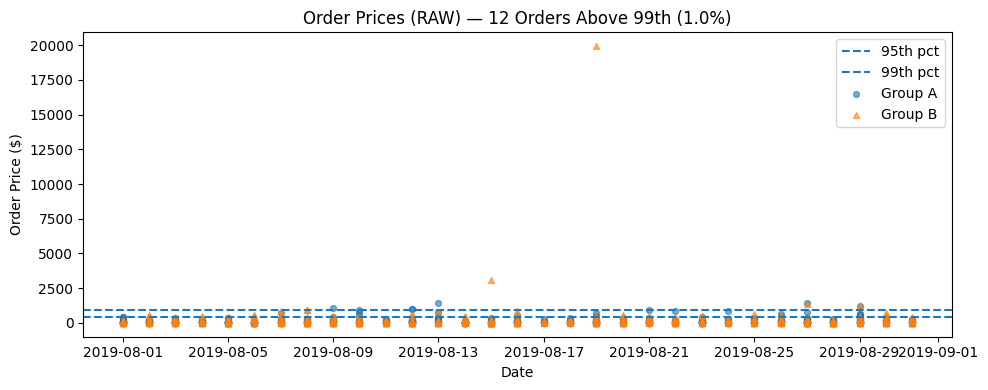

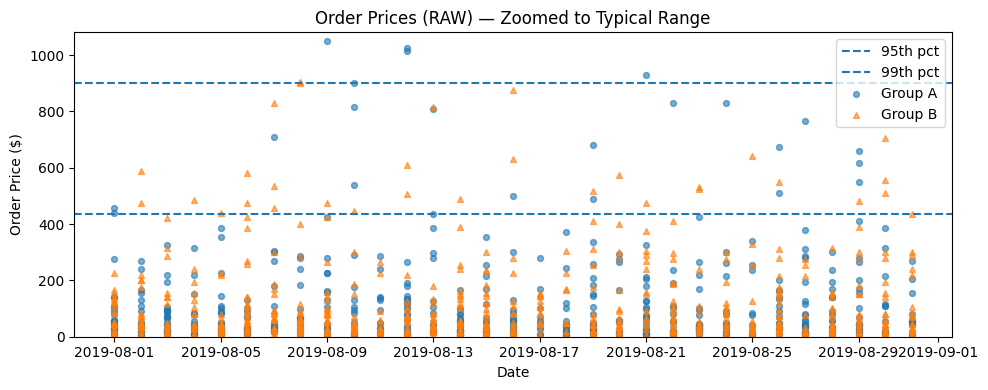

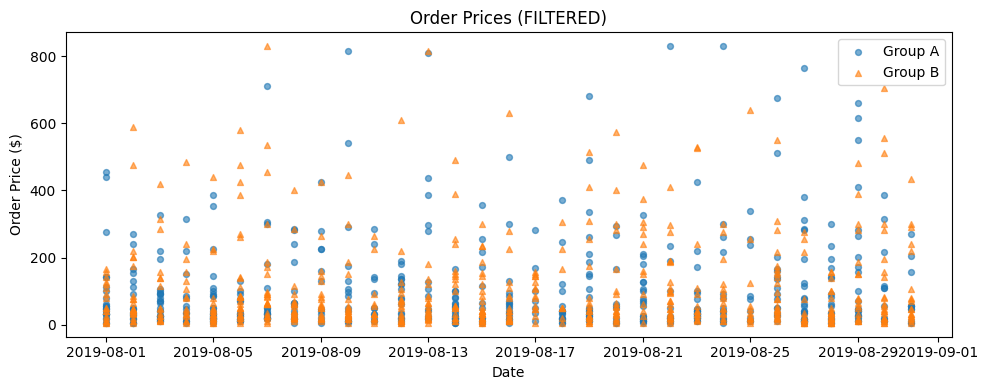

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

#Ensuring proper dtypes
orders['date'] = pd.to_datetime(orders['date'])

#Percentile cutoffs (RAW)
p95_raw = orders['revenue'].quantile(0.95)
p99_raw = orders['revenue'].quantile(0.99)
n_out_raw = (orders['revenue'] > p99_raw).sum()
share_raw = n_out_raw / len(orders) * 100

#--- A) FULL RANGE (RAW) ---
plt.figure(figsize=(10,4))
for g, marker in [('A','o'), ('B','^')]:
    subset = orders[orders['group']==g]
    plt.scatter(subset['date'], subset['revenue'], s=18, marker=marker, alpha=0.6, label=f'Group {g}')
plt.axhline(p95_raw, linestyle='--', label='95th pct')
plt.axhline(p99_raw, linestyle='--', label='99th pct')
plt.title(f'Order Prices (RAW) — {n_out_raw} Orders Above 99th ({share_raw:.1f}%)')
plt.xlabel('Date'); plt.ylabel('Order Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

#--- B) ZOOM TO TYPICAL RANGE (RAW) ---
plt.figure(figsize=(10,4))
for g, marker in [('A','o'), ('B','^')]:
    subset = orders[orders['group']==g]
    plt.scatter(subset['date'], subset['revenue'], s=18, marker=marker, alpha=0.6, label=f'Group {g}')
plt.axhline(p95_raw, linestyle='--', label='95th pct')
plt.axhline(p99_raw, linestyle='--', label='99th pct')
# Zoom so the bulk of points is readable
plt.ylim(0, max(1000, p99_raw * 1.2))
plt.title('Order Prices (RAW) — Zoomed to Typical Range')
plt.xlabel('Date'); plt.ylabel('Order Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

#--- C)FILTERED VIEW ---
if 'orders_filt' in globals():
    orders_filt['date'] = pd.to_datetime(orders_filt['date'])
    plt.figure(figsize=(10,4))
    for g, marker in [('A','o'), ('B','^')]:
        subset = orders_filt[orders_filt['group']==g]
        plt.scatter(subset['date'], subset['revenue'], s=18, marker=marker, alpha=0.6, label=f'Group {g}')
    plt.title('Order Prices (FILTERED)')
    plt.xlabel('Date'); plt.ylabel('Order Price ($)')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Strong right tail. Most orders sit between $20–$300, with a long tail to high values.
* thresholds: 95th ≈ $440 and 99th ≈ $900.9.

**Massive outliers. We detected 12 / 1,197 orders (≈1.0%) above the 99th percentile**

* A: 7 outliers, B: 5. One extreme ≈ $19,920 order in Group B dominates the scale.
These few points materially distort means.

**After filtering (≤99th pct), distributions look similar.**
* The filtered scatter shows both groups with broadly comparable ranges and day-to-day spread; no clear temporal trend or cluster unique to one group.

**Impact on AOV (average order value).**

* RAW AOV: A ≈ $115.90, B ≈ $145.06 → B looks higher.

* FILTERED AOV: A ≈ $102.95, B ≈ $101.37 → the “B is higher” story disappears once we remove the top 1% prices.
⇒ The apparent AOV advantage for B is driven by a handful of very large orders (not a systematic lift).

*Why this matters. Means are fragile with heavy-tailed prices. For fair A/B conclusions, use filtered data (or robust metrics like medians/winsorized means) and document the rule (e.g., exclude prices above the 99th percentile).*

---
**So far, what stands:**

* Conversion: B is consistently ~14–16% higher relative to A (from the cumulative conversion plot).

* AOV: No reliable advantage after filtering.

* Revenue impact will depend mostly on B’s conversion lift since AOVs align when outliers are controlled.

---

## Step 8 - Significance Tests


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Convém apresentar as hipóteses antes de realizar o teste para o leitor saber o que vai ser testado
</div>


### A) Conversion: RAW vs FILTERED (two-proportion z-test)

In [24]:
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats as st  # used later

# Make sure dates are datetime (safe if already done)
orders['date']  = pd.to_datetime(orders['date'])
visits['date']  = pd.to_datetime(visits['date'])

# Build filtered orders at the 99th percentile (price outliers removed)
price_99      = orders['revenue'].quantile(0.99)
orders_filt   = orders[orders['revenue'] <= price_99].copy()

def test_conversion(orders_df, visits_df, label):
    # total orders (distinct transactions) + total visits by group
    conv = (
        orders_df.groupby('group')['transactionId'].nunique().rename('orders')
        .to_frame()
        .join(visits_df.groupby('group')['visits'].sum().rename('visits'))
    )
    conv['conversion'] = conv['orders'] / conv['visits']

    # Order is [B, A] so that "greater" = B > A
    count  = conv.loc[['B','A'], 'orders'].values
    nobs   = conv.loc[['B','A'], 'visits'].values

    z_two, p_two       = proportions_ztest(count, nobs, alternative='two-sided')
    z_one, p_one_gt    = proportions_ztest(count, nobs, alternative='larger')  # H1: B > A

    print(f"\n[{label}]")
    print(f" A conversion = {conv.loc['A','conversion']:.4%}  "
          f"B conversion = {conv.loc['B','conversion']:.4%}")
    print(f" Abs diff (B–A) = {(conv.loc['B','conversion']-conv.loc['A','conversion']):.4%}  "
          f"Rel = {(conv.loc['B','conversion']/conv.loc['A','conversion']-1):.1%}")
    print(f" Two-sided z = {z_two:.2f}, p = {p_two:.3g}  |  One-sided (B>A) p = {p_one_gt:.3g}")
    return p_one_gt

p_conv_raw  = test_conversion(orders,      visits, "RAW")
p_conv_filt = test_conversion(orders_filt, visits, "FILTERED (≤99th pct)")



[RAW]
 A conversion = 2.9729%  B conversion = 3.3834%
 Abs diff (B–A) = 0.4105%  Rel = 13.8%
 Two-sided z = 2.27, p = 0.0232  |  One-sided (B>A) p = 0.0116

[FILTERED (≤99th pct)]
 A conversion = 2.9355%  B conversion = 3.3569%
 Abs diff (B–A) = 0.4214%  Rel = 14.4%
 Two-sided z = 2.34, p = 0.0192  |  One-sided (B>A) p = 0.00959


### B) AOV (order value): RAW vs FILTERED (Mann–Whitney U)

In [25]:
def test_aov(orders_df, label):
    a = orders_df.loc[orders_df['group']=='A', 'revenue']
    b = orders_df.loc[orders_df['group']=='B', 'revenue']

    # non-parametric, robust to heavy tails
    U_two, p_two    = st.mannwhitneyu(b, a, alternative='two-sided')
    U_one, p_one_gt = st.mannwhitneyu(b, a, alternative='greater')  # H1: B > A

    print(f"\n[{label}]")
    print(f" Mean AOV — A: ${a.mean():.2f}  B: ${b.mean():.2f}  |  Median — A: ${a.median():.2f}  B: ${b.median():.2f}")
    print(f" Mann–Whitney U = {U_two:.0f}  |  Two-sided p = {p_two:.3g}  |  One-sided (B>A) p = {p_one_gt:.3g}")
    return p_one_gt

p_aov_raw  = test_aov(orders,      "RAW")
p_aov_filt = test_aov(orders_filt, "FILTERED (≤99th pct)")


[RAW]
 Mean AOV — A: $115.90  B: $145.06  |  Median — A: $50.10  B: $50.35
 Mann–Whitney U = 180608  |  Two-sided p = 0.692  |  One-sided (B>A) p = 0.346

[FILTERED (≤99th pct)]
 Mean AOV — A: $102.61  B: $104.47  |  Median — A: $50.10  B: $50.20
 Mann–Whitney U = 177834  |  Two-sided p = 0.585  |  One-sided (B>A) p = 0.292


### C) One-line decision (uses one-sided p’s with α=0.05)

In [26]:
alpha = 0.05
print(f"\nSummary p-values (one-sided, H1: B>A): "
      f"conv_raw={p_conv_raw:.3g}, conv_filt={p_conv_filt:.3g}, "
      f"AOV_raw={p_aov_raw:.3g}, AOV_filt={p_aov_filt:.3g}")

if (p_conv_filt < alpha) and not (p_aov_filt < alpha):
    print("Decision: STOP — **Group B wins on conversion**; AOV difference vanishes after filtering. Roll out B.")
elif (p_conv_filt < alpha) and (p_aov_filt < alpha):
    print("Decision: STOP — B wins on both conversion and AOV even after filtering.")
elif (p_conv_filt >= alpha) and (p_aov_filt >= alpha):
    print("Decision: CONTINUE — no significant differences after filtering.")
else:
    print("Decision: MIXED — conversion and AOV disagree; consider extending the test or segmenting.")


Summary p-values (one-sided, H1: B>A): conv_raw=0.0116, conv_filt=0.00959, AOV_raw=0.346, AOV_filt=0.292
Decision: STOP — **Group B wins on conversion**; AOV difference vanishes after filtering. Roll out B.


#### A/B test summary

**Primary metric (conversion):**
RAW — A 2.973%, B 3.383%, +13.8% rel, p(one-sided B>A)=0.0116 ✅
FILTERED (≤99th pct) — A 2.936%, B 3.357%, +14.4% rel, p=0.0096 ✅

**AOV:**
RAW — A $115.90, B $145.06, p=0.692 (ns)
FILTERED — A $102.61, B $104.47, p=0.585 (ns)

**Conclusion:** Roll out variant B. It delivers a significant conversion lift (~14%); AOV difference is not significant.

-----

# Executive Summary

`Goal.` *To prioritize growth hypotheses and run an A/B test to determine if variant B improves business KPIs.*

### Hypothesis Prioritization

**ICE (Impact × Confidence ÷ Effort):** Top pick — “Launch a promotion with discounts for a limited time.”

**RICE (Reach × Impact × Confidence ÷ Effort):** Top picks shift to high-reach ideas — “Add a subscription form on main pages” and “Add product recommendations.”

`Takeaway:` *Once Reach is considered, ideas that touch more users move to the top.*

**A/B Test Results**

**Period:** 2019-08-01 → 2019-08-31

**Traffic sanity:** duplicates removed; groups balanced day-by-day.


**Primary metric — Conversion**

* RAW: A 2.973%, B 3.383% → +13.8% rel, one-sided p (B>A) 0.0116 ✅

* Filtered (≤99th pct price): A 2.936%, B 3.357% → +14.4% rel, p 0.0096 ✅

`Conclusion:` *Conversion uplift is statistically significant and robust to outlier filtering.*


**Secondary metric — AOV**

* RAW: A $115.90, B $145.06 → p 0.692 (ns)

* Filtered: A $102.61, B $104.47 → p 0.585 (ns)

`Conclusion:` *No significant AOV difference; uplift is driven by higher conversion.*


**Outliers & diagnostics**

* Order-price heavy tails; 1% of orders above the **99th pct ($901)**.

* Results hold after trimming those outliers.


**Business Impact (back-of-envelope)**

Using the absolute conversion lift (~+0.41 pp from A’s 2.97%) over the test traffic, B yields roughly +150 additional orders for a month of similar traffic.
With AOV ≈ $100 (filtered), expected lift ≈ $15k per month (order-of-magnitude).


### --- Decision ---

**Roll out variant B.** It consistently improves conversion (~14%); AOV is unchanged. The effect is statistically significant on raw and filtered data.

**Next Steps & Guardrails**

* Monitor SRM, daily conversion and revenue per visitor for two weeks post-rollout.

* Re-test specific ideas from RICE top-ranked list (e.g., recommendations, subscription form) to stack gains.

* For pricing outliers, consider winsorizing or robust metrics in future tests.